# Wage and Employment - Homework 2 

## Camilo Alvarez and Pedro Tanure

### Fall 2016

Importing libraries:

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot,show
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

Importing the Rouwenhorst results from Fortran output

In [3]:
# 5-state MC with rho=0.9
data = np.genfromtxt('5stMC9.csv',delimiter=',')
M9_5 = data[:,:5]
y9_5 = data[:,5]
s9_5 = data[:,6]

# 11-state MC with rho=0.9
data = np.genfromtxt('11stMC9.csv',delimiter=',')
M9_11 = data[:,:11]
y9_11 = data[:,11]
s9_11 = data[:,12]

# 21-state MC with rho=0.9
data = np.genfromtxt('21stMC9.csv',delimiter=',')
M9_21 = data[:,:21]
y9_21 = data[:,21]
s9_21 = data[:,22]

# 5-state MC with rho=0.999
data = np.genfromtxt('5stMC999.csv',delimiter=',')
M999_5 = data[:,:5]
y999_5 = data[:,5]
s999_5 = data[:,6]

# 11-state MC with rho=0.999
data = np.genfromtxt('11stMC999.csv',delimiter=',')
M999_11 = data[:,:11]
y999_11 = data[:,11]
s999_11 = data[:,12]

# 21-state MC with rho=0.999
data = np.genfromtxt('21stMC999.csv',delimiter=',')
M999_21 = data[:,:21]
y999_21 = data[:,21]
s999_21 = data[:,22]

Making the AR(1)

In [4]:
def AR1(rho,sigma,y0,n):
    y = np.zeros(n)
    
    y[0] = y0
    
    for i in range(0,n-1):
        y[i+1] = rho*y[i] + sigma*np.random.normal()
        
    return y

A function for the whole exercise

In [25]:
def simulation(rho,sigma,P,Y,stat,N):
    # IMPORTANT: sigma here is the standard deviation of the shocks, NOT of y!
    
    print('Stationary distribution:',stat)
    print('Unconditional mean:',round(np.dot(Y,stat)))
    print('Unconditional variance:',round(np.dot((Y-np.dot(Y,stat))**2,stat))) # this looks wrong (see output)

    n = 10000
    zt = np.zeros(n, dtype=np.int)
    
    
    Dist = P.copy()
    y = lambda x: Y[x]
    
    for i in range(N-1):
        Dist[:,i+1] = Dist[:,i] + Dist[:,i+1]
        
    for t in range(n-1):
        rnd = np.random.rand() # drawing from a uniform distribution
        
        
        for j in range(N):
            
            if rnd - Dist[zt[t],j] <= 0.0:
                skip = j
                break
            
        zt[t+1] = skip
        
    freq = np.zeros(N)
    for i in range(N):
        freq[i] = np.sum(zt == i)

    freq = freq / np.sum(freq)


    sim = AR1(rho,sigma,Y[zt[0]],n)

    sigma_y = (sigma**2/(1-rho**2))**0.5
    xmin = 1.1*Y[0]
    xmax = 1.1*Y[N-1]

    binSpace = np.hstack([xmin, Y, xmax])

    if N%2 == 1:
        binSpace = binSpace - (y(int((N+1)/2)) - y(int((N-1)/2)))/2
    else:
        binSpace = binSpace - (y(int((N)/2)) - y(int((N)/2-1)))/2
    
    bin100 = np.linspace(xmin, xmax, 100+1)
    
    # autocorrelations, variance and kurtosis
    rho_hat = np.corrcoef(np.array([zt[0:len(zt)-1], zt[1:len(zt)]]))
    rel_rho = rho_hat[0,1]/rho                 # relative rho
    print('Relative rho:',rel_rho)
    rel_var = np.var(zt)/np.var(sim)
    print('Relative variance:',rel_var)
    rel_kur = stats.kurtosis(zt)/stats.kurtosis(sim)
    print('Relative kurtosis:',rel_kur)
    
    
    return [freq, sim, y, bin100, binSpace, zt]

Running the thing

Stationary distribution: [  9.53674316e-07   1.90734863e-05   1.81198120e-04   1.08718872e-03
   4.62055206e-03   1.47857666e-02   3.69644165e-02   7.39288330e-02
   1.20134354e-01   1.60179138e-01   1.76197052e-01   1.60179138e-01
   1.20134354e-01   7.39288330e-02   3.69644165e-02   1.47857666e-02
   4.62055206e-03   1.08718872e-03   1.81198120e-04   1.90734863e-05
   9.53674316e-07]
Unconditional mean: 0.0
Unconditional variance: 0.0
Relative rho: 1.00311888013
Relative variance: 23.4921039149
Relative kurtosis: 0.8404228225638556


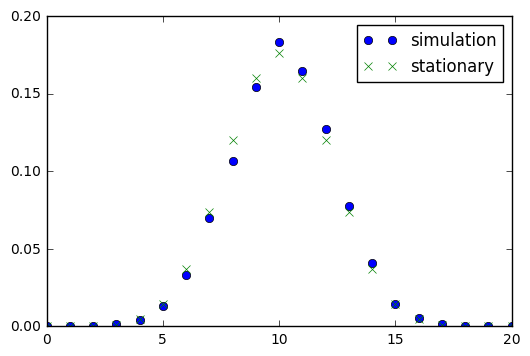

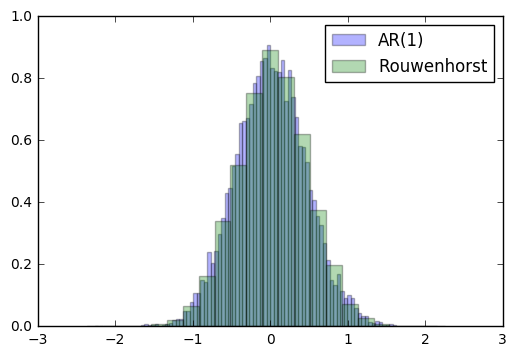

In [26]:
N = 21
rho = 0.9
sigma = 0.2

[freq, sim, y, bin100, binSpace, zt] = simulation(rho,sigma,M9_21,y9_21,s9_21,N)
with PdfPages('figure1.pdf') as pdf:
    plt.figure(0)
    plt.plot(range(N), freq, 'o', label = 'simulation')
    plt.plot(range(N), s9_21, 'x', label = 'stationary')
    plt.legend(loc = 'best')
    pdf.savefig()

with PdfPages('figure2.pdf') as pdf:
    plt.figure(1)
    plt.hist(sim, bins = bin100, alpha = 0.3, normed = True, label = 'AR(1)')
    plt.hist(y(zt), bins = binSpace, alpha = 0.3, normed = True, label = 'Rouwenhorst')
    plt.legend(loc = 'best')
    pdf.savefig()